In [93]:
#preamble 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import IBMQ
import qiskit
import random
import pandas as pd
import numpy as np 
from qiskit.providers.ibmq import IBMQJob
from qiskit.providers.ibmq.job import job_monitor


n = 2
q = QuantumRegister(n, 'q')
c = ClassicalRegister(n, 'c')
qc = []
qc.append(QuantumCircuit(q, c))



count = 0
for i in range(10):
    for j in range(5):
        qc[count].id(0)
        qc[count].id(1)
        qc.append(QuantumCircuit(q,c))
    count = count + 1

# Do it for both qubits
       





In [94]:
#defining circuits
qc = []
    



for i in range(5,25):  # no. of circuits
    n = 2
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')
    qc.append(QuantumCircuit(q,c))
    for j in range(10):
        qc[i-5].id(0)
        qc[i-5].id(1)
 
for i in range(20):
    qc[i].measure(q,c)

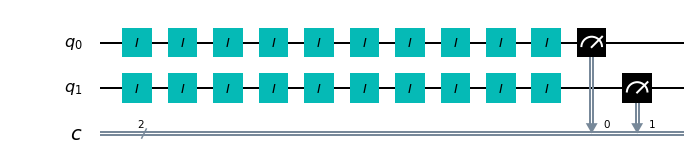

In [95]:
#checking the output
qc[19].draw(output = "mpl")


In [96]:
#saving account
IBMQ.save_account('e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d')

configrc.store_credentials:WARNING:2020-10-20 10:21:20,377: Credentials already present. Set overwrite=True to overwrite.


In [97]:
#loading account
IBMQ.load_account()
IBMQ.providers()


ibmqfactory.load_account:WARNING:2020-10-20 10:21:22,633: Credentials are already in use. The existing account in the session will be replaced.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [98]:
#checking backends
provider = IBMQ.get_provider()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [99]:
#submitting the circuit to IBM Q
backend = provider.get_backend('ibmq_ourense')

job_exp = qiskit.execute(qc,backend=backend,shots = 8132)




In [100]:
#checking the job
job_monitor(job_exp)


Job Status: job has successfully run


In [101]:
#checking the result
output = job_exp.result().get_counts()
output

#00:1, 10:2, 11:3, 01:4


[{'01': 127, '10': 165, '00': 7832, '11': 8},
 {'01': 113, '10': 170, '00': 7842, '11': 7},
 {'01': 114, '10': 179, '00': 7835, '11': 4},
 {'01': 115, '10': 150, '00': 7866, '11': 1},
 {'01': 111, '10': 156, '00': 7856, '11': 9},
 {'01': 118, '10': 160, '00': 7853, '11': 1},
 {'01': 106, '10': 154, '00': 7869, '11': 3},
 {'01': 112, '10': 162, '00': 7855, '11': 3},
 {'01': 120, '10': 163, '00': 7844, '11': 5},
 {'01': 100, '10': 158, '00': 7869, '11': 5},
 {'01': 107, '10': 167, '00': 7854, '11': 4},
 {'01': 110, '10': 169, '00': 7848, '11': 5},
 {'01': 99, '10': 185, '00': 7846, '11': 2},
 {'01': 100, '10': 133, '00': 7898, '11': 1},
 {'01': 107, '10': 147, '00': 7877, '11': 1},
 {'01': 96, '10': 170, '00': 7865, '11': 1},
 {'01': 108, '10': 182, '00': 7841, '11': 1},
 {'01': 110, '10': 157, '00': 7862, '11': 3},
 {'01': 86, '10': 186, '00': 7854, '11': 6},
 {'01': 129, '10': 165, '00': 7835, '11': 3}]

In [102]:
#creating dataframe
import pandas as pd
df = pd.DataFrame(output)
print (df)


     01   10    00  11
0   127  165  7832   8
1   113  170  7842   7
2   114  179  7835   4
3   115  150  7866   1
4   111  156  7856   9
5   118  160  7853   1
6   106  154  7869   3
7   112  162  7855   3
8   120  163  7844   5
9   100  158  7869   5
10  107  167  7854   4
11  110  169  7848   5
12   99  185  7846   2
13  100  133  7898   1
14  107  147  7877   1
15   96  170  7865   1
16  108  182  7841   1
17  110  157  7862   3
18   86  186  7854   6
19  129  165  7835   3


In [103]:
#location
path = '/Users/student/Documents/summer_research/circuit_results/project2/'

In [104]:
#saving to csv file
df.to_csv(path + '10_idgates.csv')

In [105]:
#finding the probabilty for p00,p01,p10,p11
for i in range(len(output)):
    if '00' in output[i]:
        output[i]['00'] = output[i]['00']/8132
    if '01' in output[i]:
        output[i]['01'] = output[i]['01']/8132
    if '10' in output[i]:
        output[i]['10'] = output[i]['10']/8132
    if '11' in output[i]:
        output[i]['11'] = output[i]['11']/8132
        
 

#Reason behind relative entropy (defining p_0,p_0',p_1,p_1'  to get q00,q01,...)
p_00 = p_0 * p_0’

Independent events: 


In |0>

p_0 = p_00 + p_10
p_1 = p_01 + p_11


In |1>

p_0’ = p_00 + p_01
p_1’ = p_10 + p_11




If we have independent events:

p_0 * p_0’ = q00
p_0 * p_1’ = q10
p_1 * p_0’ = q01
p_1 * p_1’ = q11


If equal then no correlation. If deviation between two of them then it gives us the correlation.




Syntax:
p_x’ = prob of measuring of getting x in the second qubit(|1>)
p_x =  prob of measuring of getting x in the first qubit(|0>)




In [106]:
#creating list for p_0,p_0_, p_1, p_1_
p_0 = []
p_0_ = []
p_1 = []
p_1_ = []

for i in range(len(output)):
    if '00' in output[i] and '01' in output[i]:
        p_0_.append(output[i]['00'] + output[i]['01'])
    elif '00' in output[i]:
        p_0_.append(output[i]['00'])
    elif '01' in output[i]:
        p_0_.append(output[i]['00'])
    else:
        p_0_.append(0)
    if '10' in output[i] and '11' in output[i]:
        p_1_.append(output[i]['10'] + output[i]['11'])
    elif '10' in output[i]:
        p_1_.append(output[i]['10'])
    elif '11' in output[i]:
        p_1_.append(output[i]['11'])
    else:
        p_1_.append(0)
    if '00' in output[i] and '10' in output[i]:
        p_0.append(output[i]['00'] + output[i]['10'])
    elif '00' in output[i]:
        p_0.append(output[i]['00'])
    elif '10' in output[i]:
        p_0.append(output[i]['10'])
    else:
        p_0.append(0)
    if '01' in output[i] and '11' in output[i]:
        p_1.append(output[i]['01'] + output[i]['11'])
    elif '01' in output[i]:
        p_1.append(output[i]['01'])
    elif '11' in output[i]:
        p_1.append(output[i]['11'])
    else:
        p_1.append(0)
        


In [107]:
 p_1_[9] + p_0_[9]

1.0

In [108]:
#double checking the length of p_0, p_1...
len(p_0),len(p_0_),len(p_1),len(p_1_)

(20, 20, 20, 20)

In [109]:
#defining the q_s based on the independence of the events. 
'''
q00 = p_0 * p_0’  
q10 = p_0 * p_1’ 
q01 = p_1 * p_0’ 
q11 = p_1 * p_1’ 

'''


q00 = []
q01 = []
q10 = []
q11 = []


for i in range(len(p_0)):
    q00.append(p_0[i] * p_0_[i])
    q01.append(p_1[i] * p_0_[i])
    q10.append(p_0[i] * p_1_[i])
    q11.append(p_1[i] * p_1_[i])


In [110]:
#double check the length of q_s
len(q00),len(q01),len(q10),len(q11)

(20, 20, 20, 20)

In [111]:
#making the list of p00, p01,p10,p11 (the outputs from IBM Q)
p00 = []
p01 = []
p10 = []
p11 = []

for i in range(len(output)):
    if '00' in output[i]:
        p00.append(output[i]['00'])
    else: 
        p00.append(0)
    if '01' in output[i]:
        p01.append(output[i]['01'])
    else: 
        p01.append(0)
    if '10' in output[i]:
        p10.append(output[i]['10'])
    else: 
        p10.append(0)
    if '11' in output[i]:
        p11.append(output[i]['11'])
    else: 
        p11.append(0)
    
  

In [112]:
#create p (list of p00,p01,p10,p11 for each output)
p = []
for i in range(len(p00)):
    p.append([p00[i],p01[i],p10[i],p11[i]])
   


In [113]:
#create q (list of q00,q01,q10,q11 for each output)
q = []
for i in range(len(q00)):
    q.append([q00[i],q01[i],q10[i],q11[i]])

In [114]:
len(p),len(q)

(20, 20)

In [115]:
p[9][1]* (np.log(p[9][1]/q[9][1]))

-0.00035098724568301547

In [116]:
X = []
for i in range(4):
    X.append(p[9][i] * (np.log(p[9][i]/q[9][i])))
             
sum(X)

0.00018432872194101873

In [117]:
l = []
y = []
for i in range(2):
    y.append(l)
y

[[], []]

In [118]:
p[1][3] * (np.log(p[1][3]/q[1][3]))

0.0008486000908919982

In [119]:
B = []
A = []
for i in range(2):
    for j in range(4):
        if p[i][j]!= 0:
            print(p[i][j] * (np.log(p[i][j]/q[i][j])))
        else:
            print("Error")


0.0006308032844136383
-0.0006181982691534892
-0.0006209960489228229
0.0010078085031892425
0.0005397595396660192
-0.000529394857421196
-0.0005327618034157197
0.0008486000908919982


In [120]:
#calculation of the relative entropy
X = []
D = []
A = len(q)
# A is the number of measurements which doesn't have three zeros. 
for i in range(A):
    for j in range(4):
        X.append(D)
        


In [121]:
#calculation of the relative entropy
X = []
D = []
A = len(q)
# A is the number of measurements which doesn't have three zeros. 
for i in range(A):
    X.append([p[i][0] * (np.log(p[i][0]/q[i][0])), p[i][1] * (np.log(p[i][1]/q[i][1])), 
            p[i][2] * (np.log(p[i][2]/q[i][2])), p[i][3] * (np.log(p[i][3]/q[i][3]))])
X

[[0.0006308032844136383,
  -0.0006181982691534892,
  -0.0006209960489228229,
  0.0010078085031892425],
 [0.0005397595396660192,
  -0.000529394857421196,
  -0.0005327618034157197,
  0.0008486000908919982],
 [0.0001653566239962491,
  -0.00016437497517819471,
  -0.00016472453975465093,
  0.00020151783500297203],
 [-0.0001418931418561491,
  0.00014262030925333077,
  0.0001424522018861761,
  -9.435659778320852e-05],
 [0.0008076634740461707,
  -0.0007843525365598024,
  -0.0007908000781367895,
  0.0014468944685952375],
 [-0.0001667343734469219,
  0.00016771427171483394,
  0.00016745938454561306,
  -0.00010538190892126846],
 [0.00011013878607119442,
  -0.00010966986575501257,
  -0.00010981351288428832,
  0.00013080943525783158],
 [8.197909063033467e-05,
  -8.173261564582349e-05,
  -8.18074094923217e-05,
  9.270666299281221e-05],
 [0.0002973416242028911,
  -0.00029434065355786704,
  -0.00029511262089345616,
  0.0004062483832247772],
 [0.000356109750541529,
  -0.00035098724568301547,
  -0.000352

In [122]:
Y = []
for i in range(len(X)):
    Y.append(sum(X[i]))
Y

[0.00039941746952656867,
 0.00032620296972110175,
 3.777494406637547e-05,
 4.882277150014926e-05,
 0.0006794053279448163,
 6.305737389225662e-05,
 2.1464842689725112e-05,
 1.1145728485001695e-05,
 0.00011413673297634513,
 0.00018432872194101873,
 6.271878206676247e-05,
 0.0001295965791116382,
 2.9916464130387026e-06,
 1.9527758749064044e-05,
 3.6573306078626003e-05,
 4.1298542770913836e-05,
 7.027256265455131e-05,
 1.5597164392350894e-05,
 0.00029401332589101765,
 1.6907172306469161e-06]

In [123]:
np.float64('nan') in Y

False

In [124]:
Y_ = [x for x in Y if x == x]
Y_


[0.00039941746952656867,
 0.00032620296972110175,
 3.777494406637547e-05,
 4.882277150014926e-05,
 0.0006794053279448163,
 6.305737389225662e-05,
 2.1464842689725112e-05,
 1.1145728485001695e-05,
 0.00011413673297634513,
 0.00018432872194101873,
 6.271878206676247e-05,
 0.0001295965791116382,
 2.9916464130387026e-06,
 1.9527758749064044e-05,
 3.6573306078626003e-05,
 4.1298542770913836e-05,
 7.027256265455131e-05,
 1.5597164392350894e-05,
 0.00029401332589101765,
 1.6907172306469161e-06]

In [125]:
np.mean(Y_), np.std(Y_)

(0.00012800186340509843, 0.00016896914052333056)

In [126]:
import pandas as pd
RE_10id = pd.DataFrame(Y_)
print(RE_10id)



           0
0   0.000399
1   0.000326
2   0.000038
3   0.000049
4   0.000679
5   0.000063
6   0.000021
7   0.000011
8   0.000114
9   0.000184
10  0.000063
11  0.000130
12  0.000003
13  0.000020
14  0.000037
15  0.000041
16  0.000070
17  0.000016
18  0.000294
19  0.000002


In [40]:
path = '/Users/student/Documents/summer_research/circuit_results/project2/'
#saving to csv file
df.to_csv(path + 'RE_10id.csv')